Initial Centroids: 
m1 (Cluster 1): [0.1 0.6]
m2 (Cluster 2): [0.3 0.2]

P6 = [0.25 0.5 ] belongs to Cluster 1 (C1)

Population of Cluster 2 (C2): 3

Updated m1 (Cluster 1): [0.148 0.712]
Updated m2 (Cluster 2): [0.24666667 0.2       ]


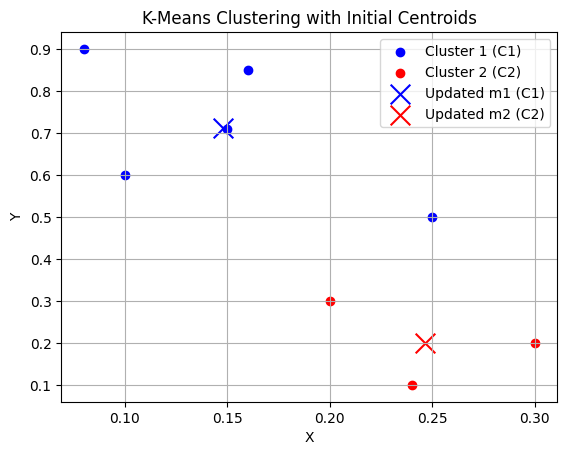

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the points as given
points = np.array([
    [0.1, 0.6],  # P1
    [0.15, 0.71],  # P2
    [0.08, 0.9],  # P3
    [0.16, 0.85],  # P4
    [0.2, 0.3],  # P5
    [0.25, 0.5],  # P6
    [0.24, 0.1],  # P7
    [0.3, 0.2]  # P8
])

# Initial centroids
m1 = np.array([0.1, 0.6])  # Centroid 1 (Cluster 1)
m2 = np.array([0.3, 0.2])  # Centroid 2 (Cluster 2)

# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Function to assign points to the nearest centroid
def assign_points_to_clusters(points, m1, m2):
    cluster_1 = []
    cluster_2 = []
    
    for point in points:
        distance_to_m1 = euclidean_distance(point, m1)
        distance_to_m2 = euclidean_distance(point, m2)
        
        if distance_to_m1 < distance_to_m2:
            cluster_1.append(point)
        else:
            cluster_2.append(point)
    
    return np.array(cluster_1), np.array(cluster_2)

# Function to update centroids
def update_centroids(cluster_1, cluster_2):
    m1_new = np.mean(cluster_1, axis=0) if len(cluster_1) > 0 else m1
    m2_new = np.mean(cluster_2, axis=0) if len(cluster_2) > 0 else m2
    return m1_new, m2_new

# Step 1: Initial assignment based on initial centroids
cluster_1, cluster_2 = assign_points_to_clusters(points, m1, m2)

# Step 2: Update centroids
m1_new, m2_new = update_centroids(cluster_1, cluster_2)

# Step 3: Output results
print("Initial Centroids: ")
print(f"m1 (Cluster 1): {m1}")
print(f"m2 (Cluster 2): {m2}")

# Answer to the first question: Which cluster does P6 belong to?
p6 = points[5]  # P6 = [0.25, 0.5]
distance_to_m1 = euclidean_distance(p6, m1)
distance_to_m2 = euclidean_distance(p6, m2)

cluster_p6 = "Cluster 1 (C1)" if distance_to_m1 < distance_to_m2 else "Cluster 2 (C2)"
print(f"\nP6 = {p6} belongs to {cluster_p6}")

# Answer to the second question: What is the population of the cluster around m2 (Cluster 2)?
print(f"\nPopulation of Cluster 2 (C2): {len(cluster_2)}")

# Answer to the third question: What is the updated value of m1 and m2?
print(f"\nUpdated m1 (Cluster 1): {m1_new}")
print(f"Updated m2 (Cluster 2): {m2_new}")

# Visualization of the clusters and updated centroids
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='blue', label='Cluster 1 (C1)')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color='red', label='Cluster 2 (C2)')
plt.scatter(m1_new[0], m1_new[1], color='blue', marker='x', s=200, label='Updated m1 (C1)')
plt.scatter(m2_new[0], m2_new[1], color='red', marker='x', s=200, label='Updated m2 (C2)')

plt.title('K-Means Clustering with Initial Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()
